In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [2]:
import pandas as pd
import numpy as np 
import matplotlib as plt

In [3]:
df=pd.read_csv('train_LoanPredDataset.csv')
df.shape
df.head(10)

(614, 13)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


- LoanAmount has 22 missing values.
- Loan_Amount_Term has 14 missing values.
- Credit_History has 50 missing values.
- About 84% applicants have a credit_history.
- Dataset is biased towards the people with smaller salary.

In [5]:
# now for non-numerical values, we can look at the frequency distribution to understand whether they make sense or not.

df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [6]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

### Distribution analysis

<AxesSubplot:>

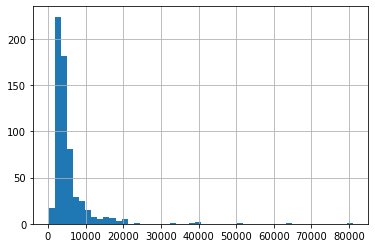

In [7]:
%matplotlib inline
df['ApplicantIncome'].hist(bins=50)

- The distribution is highly skewed towards left.

<AxesSubplot:>

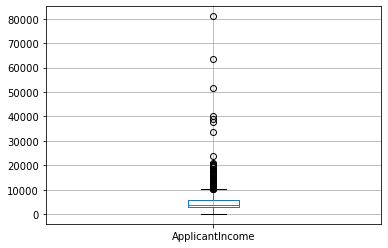

In [8]:
#look at boxplot to understand the distribution more.
df.boxplot(column='ApplicantIncome')

- This confirms that there is a lot of outliers.

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

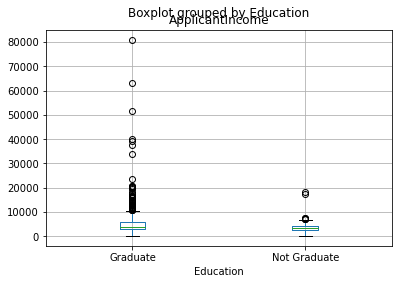

In [9]:
df.boxplot(column='ApplicantIncome', by='Education')

- not much difference between mean income of graduates and non-graduates.
- there are higher number of graduates with very high incomes appearing as outlier.

array([[<AxesSubplot:title={'center':'LoanAmount'}>]], dtype=object)

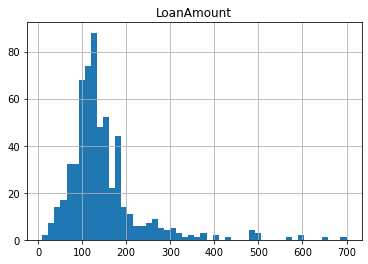

In [10]:
df.hist(column='LoanAmount',bins=50)

<AxesSubplot:>

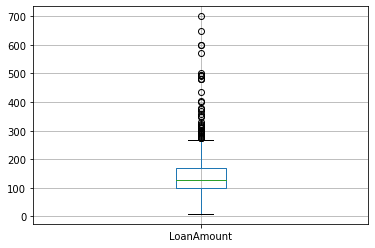

In [11]:
df.boxplot(column='LoanAmount')

- Again there are extreame values

both ApplicantIncome and LoanAmount require some data cleaning. LoanAmount has missing values and well as extreame values, while ApplicantIncome has a few extreame values, which demand deeper understanding.

### Categorical variable analysis

In [12]:
temp=df['Credit_History'].value_counts(ascending=True)
print('frequency table for credit history:')
temp

frequency table for credit history:


0.0     89
1.0    475
Name: Credit_History, dtype: int64

In [13]:
temp1=df.pivot_table(values='Loan_Status',index='Credit_History',aggfunc=lambda x:x.map({'Y':1,'N':0}).mean())
print('Probability of getting loan for each credit history class:')
temp1

Probability of getting loan for each credit history class:


,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789


Text(0.5, 0, 'Credit_History')

Text(0, 0.5, 'Count of Applicants')

Text(0.5, 1.0, 'Applicants by Credit_History')

<AxesSubplot:title={'center':'Applicants by Credit_History'}, xlabel='Credit_History', ylabel='Count of Applicants'>

<AxesSubplot:xlabel='Credit_History'>

Text(0.5, 0, 'Credit_History')

Text(0, 0.5, 'Probability of getting loan')

Text(0.5, 1.0, 'Probability of getting loan by Credit_History')

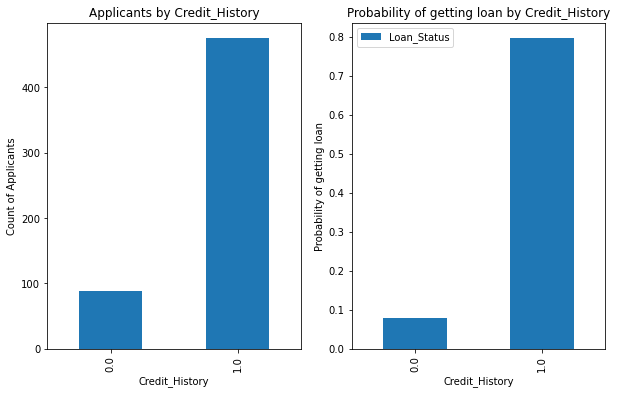

In [14]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,6))
ax1=fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title('Applicants by Credit_History')
temp.plot(kind='bar')

ax2=fig.add_subplot(122)
temp1.plot(kind='bar',ax=ax2)
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title('Probability of getting loan by Credit_History')


- 'Probability of getting loan by Credit_History' shows that the chances of getting a loan are eight-fold if the applicant has a valid credit history.

<AxesSubplot:xlabel='Credit_History'>

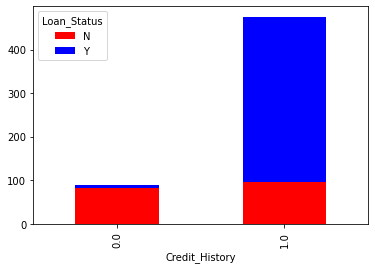

In [15]:
temp3=pd.crosstab(df['Credit_History'],df['Loan_Status'])
temp3.plot(kind='bar',stacked=True,color=['red','blue'])

In [16]:
temp3=df.pivot_table(values='Loan_Status',index='Married',aggfunc=lambda x:x.map({'Y':1,'N':0}).mean())
print('Probability of getting loan for each Self_Employed class:')
temp3

Probability of getting loan for each Self_Employed class:


,Loan_Status
Married,
No,0.629108
Yes,0.716080


In [17]:
temp4=df.pivot_table(values='Loan_Status',index='Gender',aggfunc=lambda x:x.map({'Y':1,'N':0}).mean())
print('Probability of getting loan for each Gender class:')
temp4

Probability of getting loan for each Gender class:


,Loan_Status
Gender,
Female,0.669643
Male,0.693252


In [18]:
temp5=df.pivot_table(values='Loan_Status',index='Self_Employed',aggfunc=lambda x:x.map({'Y':1,'N':0}).mean())
print('Probability of getting loan for each Self_Employed class:')
temp5

Probability of getting loan for each Self_Employed class:


,Loan_Status
Self_Employed,
No,0.686000
Yes,0.682927


<AxesSubplot:xlabel='Credit_History,Gender'>

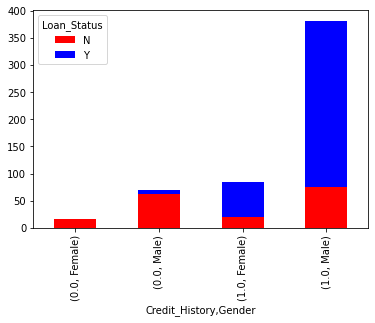

In [19]:
temp6=pd.crosstab([df['Credit_History'],df['Gender']],df['Loan_Status'])
temp6.plot(kind='bar',stacked=True,color=['red','blue'])

- Thus, overall loan status can be predicted based on gender, as well as credit history.

## Data Munging

### Missing values in the dataset

In [20]:
#Most models do not work with missing values and so we should somehow remove these missing values.

df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
# Fill missing values

#df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

We can fill missing values by average amount. But a key hypothesis is that the whether a person is educated or self-employed can combine to give a good estimate of loan amount.

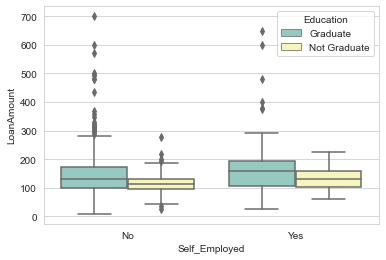

In [22]:
import seaborn as sns
sns.set_style('whitegrid')
ax=sns.boxplot(x='Self_Employed',y='LoanAmount',hue='Education',data=df,palette='Set3')

We see some variation in the median of loan amount for each group and this can be used to impute the values.But first, we have to ensure that each of Self-Employed and Education variable should not have missing values.

In [23]:
#Self_Employed has some missing values.

df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

- Since about 86% values are "No", it is safe to impute the missing values as "No" as there is a high probability of success.

In [24]:
df['Self_Employed'].fillna('No',inplace=True)

In [25]:
table=df.pivot_table(values='LoanAmount',index='Self_Employed',columns='Education',aggfunc=np.median)
#Define function to return value of this pivot_table.
table
def fage(x):
    return table.loc[x['Self_Employed'],x['Education']]

#Replace missing values
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1),inplace=True)

Education,Graduate,Not Graduate
Self_Employed,,
No,130.0,113.0
Yes,157.5,130.0


In [26]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [27]:
df['Gender'].fillna('Male',inplace=True)

In [28]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [29]:
df['Married'].fillna('Yes',inplace=True)

In [30]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [31]:
df['Dependents'].fillna('0',inplace=True)

In [32]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [33]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)

In [34]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [35]:
df['Credit_History'].fillna(0.1,inplace=True)

In [36]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Handle extreme values

- Since the extreme values are practically possible, i.e. some people might apply for high value loan due to specific needs.Son instead of taking them as outliers, let's try a log transformation to nullify their effect.
- And then the distribution look so much closer to normal and effect of extreme values has been significantly subsided.

<AxesSubplot:>

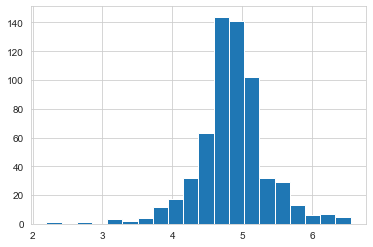

In [37]:
df['LoanAmount_log']=np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

For ApplicantIncome, one intuition can be that some applicants have lower income but strong support Co-applicants.So it might be a good idea to combine and take a log transformation for the same. 

<AxesSubplot:>

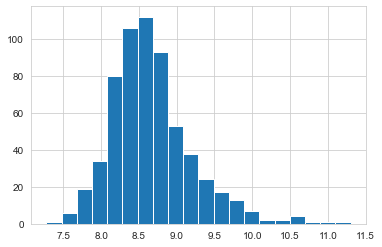

In [38]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']
df['TotalIncome']=np.log(df['TotalIncome'])
df['TotalIncome'].hist(bins=20)

- Now we see that the distribution is much better than before.

## Building apredictive model

- After we have made the data useful for modeling, let's now look at the code to create a predictive model on our dataset.
- Since, sklearn requires all inputs to be numeric, we should convert all our categorical variables into numeric by encoding the categories.

In [39]:
from sklearn.preprocessing import LabelEncoder
var_mod=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le=LabelEncoder()
for i in var_mod:
    df[i]=le.fit_transform(df[i])
df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
LoanAmount_log       float64
TotalIncome          float64
dtype: object

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [41]:
#Genric function for making a classification model and assessing performance
def classification_model(model, data, predictors, outcome):
    #fit the model:
    model.fit(data[predictors],data[outcome])
    #make predictions on training set:
    predictions=model.predict(data[predictors])
    #print accuracy:
    accuracy=metrics.accuracy_score(predictions,data[outcome])
    print("Accuracy: %s" % "{0:.3%}".format(accuracy))
    #perform k-fold cross-validation with 5 folds
    kf=KFold(n_splits=10)
    accur=[]
    for train, test in kf.split(data):
        #filter training data:
        train_predictors=(data[predictors].iloc[train,:])
        #the target we are using to train the algorithm.
        train_target=data[outcome].iloc[train]
        #training the algorithm using the predictors and target.
        model.fit(train_predictors,train_target)
        #record error from each cross-validation run
        accur.append(model.score(data[predictors].iloc[test,:],data[outcome].iloc[test]))
    print("Cross-Validation score : %s" % "{0:.3%}".format(np.mean(accur)))
    #fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome])

In [59]:
import random 
random.seed(1)
outcome_var='Loan_Status'
model=DecisionTreeClassifier()
predictor_var=['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model,df,predictor_var,outcome_var)

Accuracy: 81.433%
Cross-Validation score : 77.708%


In [63]:
model=DecisionTreeClassifier()
predictor_var=['Credit_History','Education','Married','Self_Employed']
classification_model(model,df,predictor_var,outcome_var)

Accuracy: 81.107%
Cross-Validation score : 80.148%


In [75]:
model=DecisionTreeClassifier()
predictor_var=['Credit_History','Education']
classification_model(model,df,predictor_var,outcome_var)

Accuracy: 80.945%
Cross-Validation score : 80.960%


In [77]:
model=LogisticRegression()
predictor_var=['Credit_History','Education','Married','Loan_Amount_Term','LoanAmount_log']
classification_model(model,df,predictor_var,outcome_var)

Accuracy: 77.036%
Cross-Validation score : 77.039%


In [79]:
model=RandomForestClassifier()
predictor_var=['Credit_History','Education']
classification_model(model,df,predictor_var,outcome_var)

Accuracy: 80.945%
Cross-Validation score : 80.960%


## Test data preprocessing

In [47]:
df_test=pd.read_csv('test_LoanPredDataset.csv')

In [48]:
df_test.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
Loan_Status           0
dtype: int64

In [49]:
df_test['Self_Employed'].fillna('No',inplace=True)
table=df_test.pivot_table(values='LoanAmount',index='Self_Employed',columns='Education',aggfunc=np.median)
def fage(x):
    return table.loc[x['Self_Employed'],x['Education']]
df_test['LoanAmount'].fillna(df_test[df_test['LoanAmount'].isnull()].apply(fage, axis=1),inplace=True)
df_test['Gender'].fillna('Male',inplace=True)
df_test['Married'].fillna('Yes',inplace=True)
df_test['Dependents'].fillna('0',inplace=True)
df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].mean(),inplace=True)
df_test['Credit_History'].fillna(0.1,inplace=True)
df_test['LoanAmount_log']=np.log(df_test['LoanAmount'])
df_test['TotalIncome']=df_test['ApplicantIncome']+df_test['CoapplicantIncome']
df_test['TotalIncome']=np.log(df_test['TotalIncome'])
for i in var_mod:
    df_test[i]=le.fit_transform(df_test[i])


In [50]:
df_test.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
dtype: int64

In [106]:
model=RandomForestClassifier(random_state = 1, max_depth = 15,criterion='entropy',
                             n_estimators = 500, min_samples_split = 2, min_samples_leaf = 1)
predictor_var=['Credit_History','Education']
model.fit(df[predictor_var],df[outcome_var])
accuracy=model.score(df_test[predictor_var],df_test[outcome_var])
round(accuracy*100,3)

RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=500,
                       random_state=1)

80.381